In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df1 = pd.read_csv('takehome_user_engagement.csv')
df2 = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [3]:
print(df1.info())
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [4]:
#change df1's column's to approperatie units
df1['time_stamp'] = pd.to_datetime(df1['time_stamp'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [5]:
#sorting df1 from oldest to newest, reset index to have nice order again and kept old index for 'adopted_users'
df1.sort_values(by='time_stamp', inplace=True)
df1['time_stamp'] = df1['time_stamp'].apply(lambda time: time.date())
df1.reset_index(inplace=True)

In [6]:
df1

,index,time_stamp,user_id,visited
0,178140,2012-05-31,10012,1
1,59486,2012-05-31,3428,1
2,175638,2012-05-31,9899,1
3,26821,2012-05-31,1693,1
4,109716,2012-06-01,6102,1
5,200931,2012-06-01,11430,1
6,32373,2012-06-01,1995,1
7,179759,2012-06-01,10163,1
8,140780,2012-06-01,8068,1
9,192393,2012-06-01,10922,1


In [7]:
#set up for 'adopted_users' column, create set of all dates and set 'adopted_users' column to 0
dates = set(df1['time_stamp'])
df1['adopted_users'] = 0
len(df1)

207917

In [8]:
#created an empty df that we will add to
#pull the orginal df in chunks the look only thourgh the last 7 days, if user_id appears more than 3 times
#then it is added to list of adopted users and will become 1 in our chunk of df
#add chunk df to new df

d = dt.timedelta(days=7)


df1_new = pd.DataFrame(columns = ['time_stamp','user_id','visited'])

for week_end in dates:
    df_slice = df1.loc[(df1['time_stamp'] <= week_end) & (df1['time_stamp'] >=  week_end - d)]
    num_user_is_on = df_slice['user_id'].value_counts()
    num_user_is_on = dict(num_user_is_on)
    
    adopted_users=[]
    for key,value in num_user_is_on.items():
        if(value >= 3):
            adopted_users.append(key)
    
    df_slice['adopted_users'] = df_slice['user_id'].apply(lambda user_id: 1 if user_id in adopted_users else 0)
    
    df1_new = df1_new.append(df_slice.loc[df_slice['time_stamp']==week_end],ignore_index=False)
print(df1_new.info()) 
df1_new

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 4943 to 52909
Data columns (total 5 columns):
adopted_users    207917 non-null float64
index            207917 non-null float64
time_stamp       207917 non-null object
user_id          207917 non-null object
visited          207917 non-null object
dtypes: float64(2), object(3)
memory usage: 9.5+ MB
None


,adopted_users,index,time_stamp,user_id,visited
4943,1.0,192076.0,2012-10-20,10869,1
4944,0.0,3201.0,2012-10-20,197,1
4945,0.0,44591.0,2012-10-20,2622,1
4946,1.0,56844.0,2012-10-20,3269,1
4947,0.0,25608.0,2012-10-20,1561,1
4948,1.0,110524.0,2012-10-20,6171,1
4949,1.0,169589.0,2012-10-20,9601,1
4950,1.0,171352.0,2012-10-20,9691,1
4951,1.0,47261.0,2012-10-20,2744,1
4952,1.0,59046.0,2012-10-20,3411,1


In [9]:
"""#dropped "repeats", tracked by their orginal index column and change df1_new's column's to approperatie units
df1_new.drop_duplicates(subset =['index'],keep ='last',inplace=True)
print(df1_new.info())
df1_new"""
#got around that issue

'#dropped "repeats", tracked by their orginal index column and change df1_new\'s column\'s to approperatie units\ndf1_new.drop_duplicates(subset =[\'index\'],keep =\'last\',inplace=True)\nprint(df1_new.info())\ndf1_new'

In [10]:
df1_adopted_user = df1_new.loc[df1_new['adopted_users']==1]

df1_adopted_user.drop_duplicates(subset =['user_id'],inplace=True)

len(df1_adopted_user)
#small number of users out of 12000


C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1656

In [11]:
df2['adpoted_user'] = df2.object_id.apply(lambda q: 1 if q in df1_adopted_user['user_id'] else 0)
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adpoted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,0


In [12]:
#change df2's column's to approperatie units, need org id to be int

df2['creation_time'] = pd.to_datetime(df2['creation_time'])
df2['object_id'] = df2['object_id'].astype(object)
df2['org_id'] = df2['org_id'].astype(object)
df2['invited_by_user_id'] = df2['invited_by_user_id'].astype(object)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null object
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null object
invited_by_user_id            6417 non-null object
adpoted_user                  12000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 1.0+ MB


In [13]:
df = pd.merge(df1_new, df2, how='inner', left_on='user_id', right_on='object_id')
df

,adopted_users,index,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adpoted_user
0,1.0,192076.0,2012-10-20,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0
1,1.0,192057.0,2012-08-29,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0
2,0.0,192090.0,2013-01-09,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0
3,1.0,192087.0,2012-11-22,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0
4,1.0,192088.0,2012-11-24,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0
5,1.0,192074.0,2012-10-15,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0
6,1.0,192064.0,2012-09-25,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0
7,0.0,192052.0,2012-08-13,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0
8,1.0,192083.0,2012-11-14,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0
9,1.0,192085.0,2012-11-18,10869,1,10869,2012-06-28 00:23:35,Cowie Alex,AlexCowie@gustr.com,SIGNUP,1.357691e+09,0,0,275,NaN,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 16 columns):
adopted_users                 207917 non-null float64
index                         207917 non-null float64
time_stamp                    207917 non-null object
user_id                       207917 non-null object
visited                       207917 non-null object
object_id                     207917 non-null object
creation_time                 207917 non-null datetime64[ns]
name                          207917 non-null object
email                         207917 non-null object
creation_source               207917 non-null object
last_session_creation_time    207917 non-null float64
opted_in_to_mailing_list      207917 non-null int64
enabled_for_marketing_drip    207917 non-null int64
org_id                        207917 non-null object
invited_by_user_id            116887 non-null object
adpoted_user                  207917 non-null int64
dtypes: datetime64[ns](1), float6

# Descriptive Stats

In [15]:
df2_adopted_user = df2.loc[df2['adpoted_user']==1]
df2_adopted_user

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adpoted_user
204,205,2012-08-30 06:46:12,Smith Sarah,SarahRSmith@gmail.com,PERSONAL_PROJECTS,1.346309e+09,0,0,0,NaN,1
277,278,2014-05-09 18:30:15,Simonsen Freja,FrejaMSimonsen@gustr.com,ORG_INVITE,1.399747e+09,0,0,27,1806,1
440,441,2014-02-24 17:19:34,Symons Seth,lpqlhbjt@qxqou.com,ORG_INVITE,NaN,0,1,162,1887,1
447,448,2013-11-22 10:28:29,Mortimer Jorja,JorjaMortimer@gmail.com,SIGNUP_GOOGLE_AUTH,1.385462e+09,0,0,1,NaN,1
715,716,2013-07-12 09:05:16,Rocha Isabelle,IsabelleCunhaRocha@yahoo.com,ORG_INVITE,1.375175e+09,0,0,142,1149,1
780,781,2013-10-24 21:14:27,McCurley Michael,MichaelCMcCurley@yahoo.com,PERSONAL_PROJECTS,NaN,0,0,0,NaN,1
782,783,2012-10-08 20:34:56,Barr Charlotte,CharlotteBarr@gustr.com,ORG_INVITE,1.401828e+09,0,0,77,7209,1
832,833,2012-10-18 00:08:37,Fernandes Sarah,SarahSantosFernandes@yahoo.com,ORG_INVITE,1.350605e+09,0,0,227,11177,1
870,871,2013-04-18 19:45:52,Lund Malou,MalouOLund@yahoo.com,ORG_INVITE,NaN,0,0,351,2393,1
1129,1130,2014-02-25 16:44:03,Schroder Christian,ChristianSchroder@jourrapide.com,SIGNUP,NaN,0,0,187,NaN,1


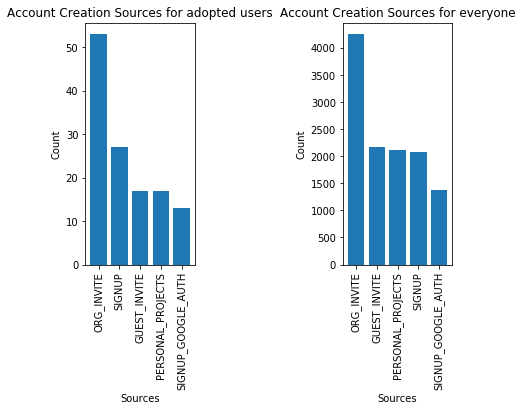

In [29]:

plt.subplot(121)
plt.bar(df2_adopted_user['creation_source'].value_counts().index,
        df2_adopted_user['creation_source'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Account Creation Sources for adopted users')
plt.xlabel('Sources')
plt.ylabel('Count')

plt.subplot(122)
plt.bar(df2['creation_source'].value_counts().index,
        df2['creation_source'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Account Creation Sources for everyone')
plt.xlabel('Sources')
plt.ylabel('Count')

plt.subplots_adjust(top=0.92, bottom=0.08, left=1.10, right=1.95, hspace=0.25,wspace=1.35)

plt.show()

In [17]:
df2['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
6      138
5      128
9      124
7      119
10     104
8       97
14      87
11      75
12      75
17      74
18      73
13      72
16      72
20      68
15      64
24      63
25      62
28      61
23      60
30      59
22      58
40      57
33      57
21      56
27      55
      ... 
403     13
404     13
295     12
346     12
405     12
301     12
232     12
354     12
344     12
356     12
387     12
381     12
322     12
407     12
364     11
365     11
183     11
353     10
352     10
304     10
378     10
294     10
395      9
315      9
396      9
355      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [18]:
df2['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
6      138
5      128
9      124
7      119
10     104
8       97
14      87
11      75
12      75
17      74
18      73
13      72
16      72
20      68
15      64
24      63
25      62
28      61
23      60
30      59
22      58
40      57
33      57
21      56
27      55
      ... 
403     13
404     13
295     12
346     12
405     12
301     12
232     12
354     12
344     12
356     12
387     12
381     12
322     12
407     12
364     11
365     11
183     11
353     10
352     10
304     10
378     10
294     10
395      9
315      9
396      9
355      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [19]:
from nxviz import ArcPlot,CircosPlot
import networkx as nx

G = nx.Graph()

In [20]:
def get_nodes_from_partition(Graph,partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in Graph.nodes():
        # Check that the node belongs to the particular partition
        if Graph.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

In [21]:
org_user_list = [tuple(df2.loc[row][['object_id','org_id']]) for row in df2.index]

G.add_nodes_from(list(df2['object_id']),bipartite='user_id')
G.add_nodes_from(list(df2['org_id']),bipartite='org_id')
G.add_edges_from(list(org_user_list))


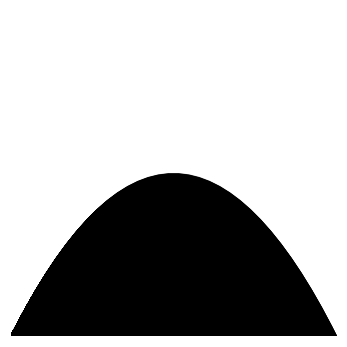

In [22]:
a = ArcPlot(G,node_grouping='bipartite',node_color='bipartite')
a.draw()
plt.show()

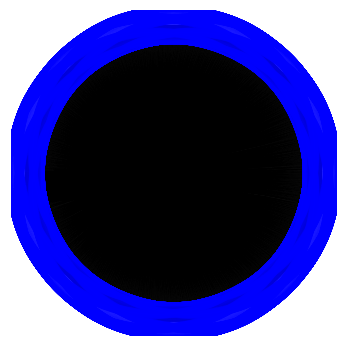

In [23]:
c = CircosPlot(graph=G)
c.draw()
plt.show()